**Pathrise Project**

The Pathrise Data Challenge aims to predict job placement outcomes for its tech mentorship program participants by combining elements of both classification and regression to analyze past participant data.

The project has two primary objectives:

1.Determining whether a participant will secure a job.

2.Estimating the timeframe for job acquisition.

This involves conducting exploratory data analysis, standardizing the data, and dividing it into training and test datasets. Various predictive models, including SVM, Classification Trees, and Logistic Regression, are evaluated to identify the most effective method. This analysis is key for Pathrise in optimizing its program to better support its participants, leveraging essential libraries and auxiliary functions to streamline the analytical process.

**Import Libraries**

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC,SVR
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import scipy.stats as sts
import pickle
from warnings import simplefilter
simplefilter(action='ignore', category=[FutureWarning])

In [2]:
df=pd.read_excel('Data_Pathrise (3).xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [3]:
df.head()

id pathrise_status primary_track cohort_tag  program_duration_days  placed  \
0   1          Active           SWE     OCT19A                    NaN       0   
1   2          Active           PSO     JAN20A                    NaN       0   
2   3     Closed Lost        Design     AUG19B                    0.0       0   
3   4     Closed Lost           PSO     AUG19B                    0.0       0   
4   5          Placed           SWE     AUG19A                   89.0       1   

    employment_status highest_level_of_education length_of_job_search  \
0          Unemployed          Bachelor's Degree           3-5 months   
1          Unemployed    Some College, No Degree           3-5 months   
2  Employed Part-Time            Master's Degree  Less than one month   
3          Contractor          Bachelor's Degree  Less than one month   
4          Unemployed          Bachelor's Degree           1-2 months   

            biggest_challenge_in_search professional_experience  \
0       Hearing back on my applications               3-4 years   
1   Getting past final round interviews               1-2 years   
2  Figuring out which jobs to apply for      Less than one year   
3   Getting past final round interviews      Less than one year   
4       Hearing back on my applications               1-2 years   

  work_authorization_status  number_of_interviews  number_of_applications  \
0            Canada Citizen                   2.0                     900   
1                   Citizen                   6.0                       0   
2                   Citizen                   0.0                       0   
3                   Citizen                   5.0                      25   
4               F1 Visa/OPT                  10.0                     100   

  gender                                 race  
0   Male  Non-Hispanic White or Euro-American  
1   Male  Non-Hispanic White or Euro-American  
2   Male         East Asian or Asian American  
3   Male             Decline to Self Identify  
4   Male         East Asian or Asian American

**Exploratory Data Analysis**

In [6]:
for cols in df.columns:
    print("Distinct values of the column {} are {}:".format(cols, len(df[cols].unique())), "\nThe values are\n\n", df[cols].unique(), "\n")

Distinct values of the column id are 2544: 
The values are

 [   1    2    3 ... 2542 2543 2544] 

Distinct values of the column pathrise_status are 9: 
The values are

 ['Active' 'Closed Lost' 'Placed' 'Withdrawn (Failed)' 'Withdrawn (Trial)'
 'Withdrawn' 'Deferred' 'Break' 'MIA'] 

Distinct values of the column primary_track are 6: 
The values are

 ['SWE' 'PSO' 'Design' 'Data' 'Web' 'Marketing'] 

Distinct values of the column cohort_tag are 48: 
The values are

 ['OCT19A' 'JAN20A' 'AUG19B' 'AUG19A' 'SEP19A' 'AUG19C' 'DEC19A' 'FEB20A'
 'NOV19A' 'NOV19B' 'JAN20B' 'FEB20B' 'JUL19B' 'APR20A' 'OCT18A' 'SEP18C'
 'OCT18B' 'JAN19A' 'MAR19A' 'FEB19A' 'FEB19B' 'APR19A' 'AUG18A' 'DEC18A'
 'MAR19B' 'JAN19B' 'JUN19B' 'SEP18B' 'NOV18A' 'SEP18A' 'APR19B' 'MAY19A'
 'JUL19A' 'JUN19A' 'FEB18A' 'JUN18A' 'MAR18A' 'APR18A' 'APR18B' 'MAY18A'
 'OCT21A' 'SEP19B' 'MAR20A' 'MAY19B' 'FEB20a' 'OCT19B' 'JAN18A' nan] 

Distinct values of the column program_duration_days are 412: 
The values are

 [ nan   0.  89

In [7]:
for cols in df.columns:
    if df[cols].count()<len(df.index):
       print("The column {}has {} missing values\n".format(cols,df[cols].isnull().sum()))

The column cohort_taghas 8 missing values

The column program_duration_dayshas 616 missing values

The column employment_statushas 229 missing values

The column highest_level_of_educationhas 58 missing values

The column length_of_job_searchhas 74 missing values

The column biggest_challenge_in_searchhas 24 missing values

The column professional_experiencehas 222 missing values

The column work_authorization_statushas 284 missing values

The column number_of_interviewshas 218 missing values

The column genderhas 492 missing values

The column racehas 18 missing values



In [8]:
cols_name=[]
for col in df.columns:
    cols_name.append(col.strip())
df.columns=cols_name

In [9]:
df.columns

Index(['id', 'pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')

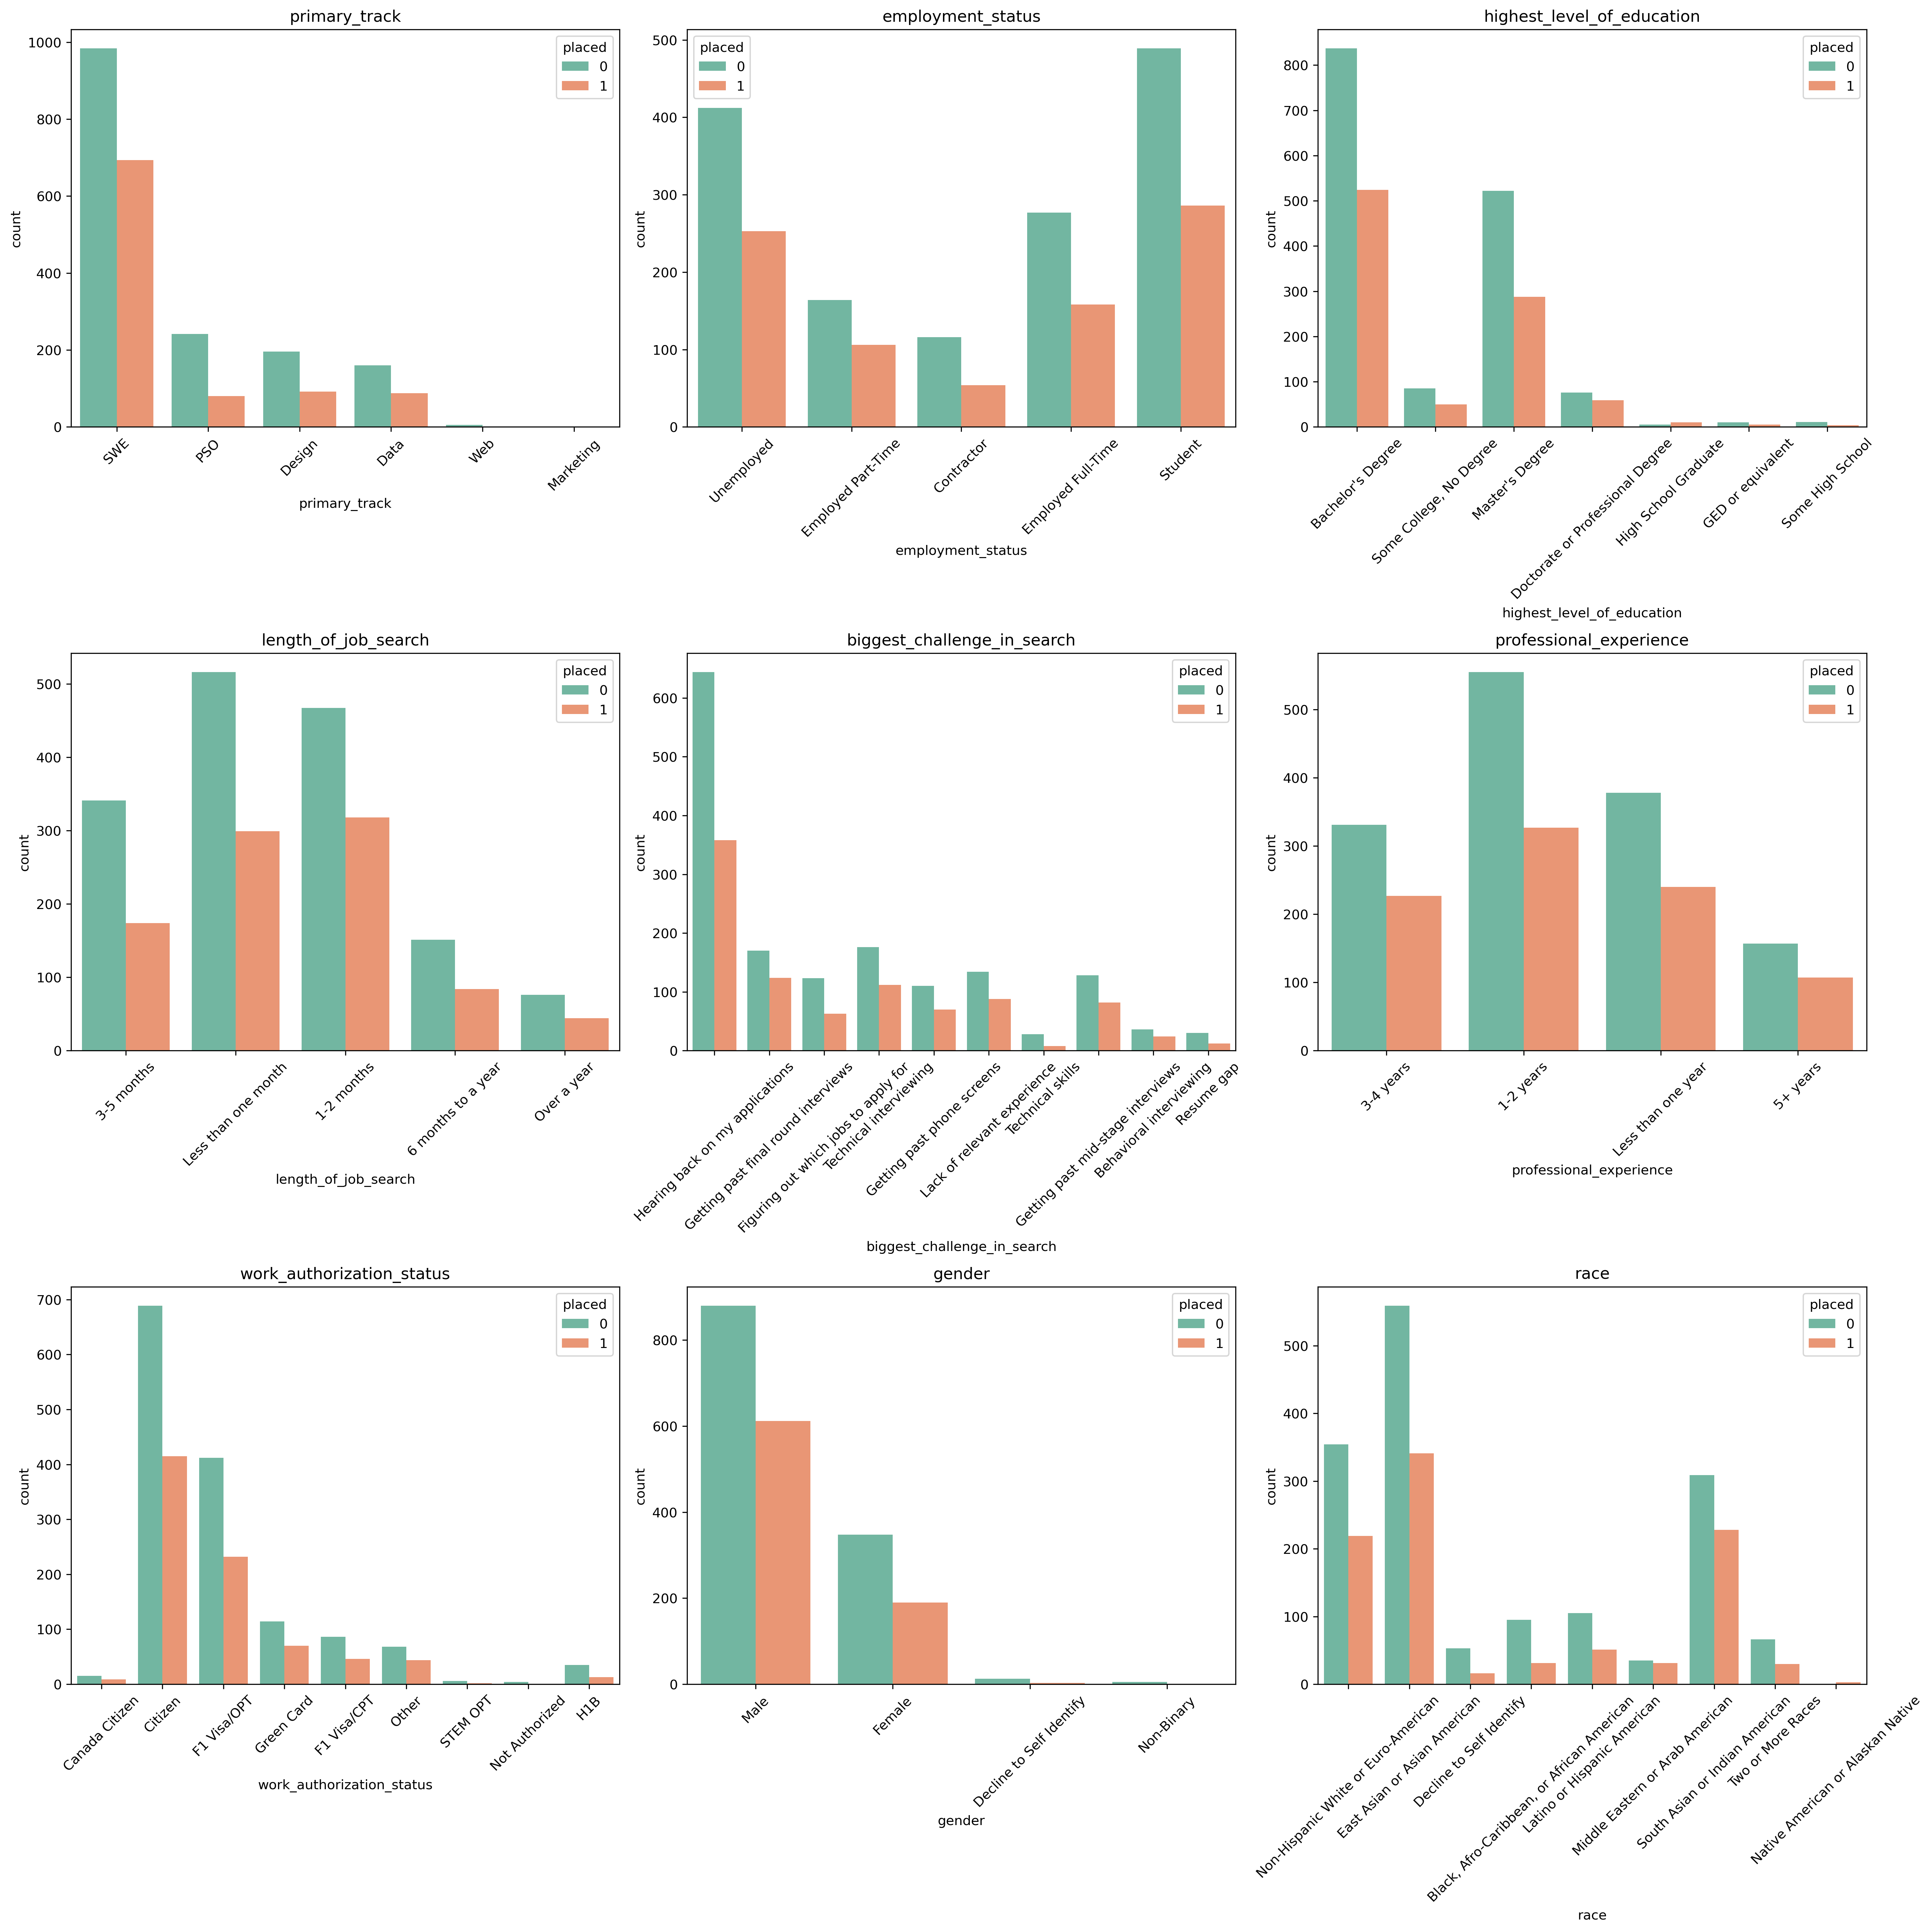

In [10]:
cols_name=['primary_track', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender', 'race']

plt.figure(figsize=(20,20),dpi=300,layout='constrained')
for i,j in enumerate(cols_name):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=j,hue='placed',palette='Set2')
    plt.title(j)
    plt.xticks(rotation=45)

In [11]:
cols_name=['primary_track', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender','race']
rows=3
cols=3
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(30,30),dpi=300)
for i,j in enumerate(cols_name):
    row=i%rows
    col=i//rows
    df_pie=df[[j,'placed']]
    df_pie=df_pie[df['placed']==1]
    labels=df_pie[j].value_counts().index
    data=df_pie[j].value_counts().values
    max_value=max(df_pie[j].value_counts().values)
    explode=[0.1*int(i/max_value) for i in data]
    ax[row,col].set_title('placed/{}'.format(j))
    ax[row,col].pie(data,labels=labels,autopct='%.0f%%',explode=explode)
    inner_circle=plt.Circle((0,0),0.4,color='white')
    ax[row,col].add_artist(inner_circle)

In [12]:
cols=['primary_track', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender', 'race']
dic_pivot={}
for col in cols:
    pivot_table1=pd.pivot_table(df[[col,'placed']],index='placed', columns=col, aggfunc='size',fill_value=0)
    column_total=pivot_table1.sum()
    pivot_table2=pivot_table1.divide(column_total)*100
    pivot_table2.index=['Not placed %','Placed %']
    row_total=column_total.sum()
    population=column_total.divide(row_total)*100
    pivot_table2.loc['population %']=population
    dic_pivot[col]=pivot_table2
    ptivot_heat=pivot_table2.style.background_gradient(cmap ='viridis').format("{:.2f}")
    display(ptivot_heat)

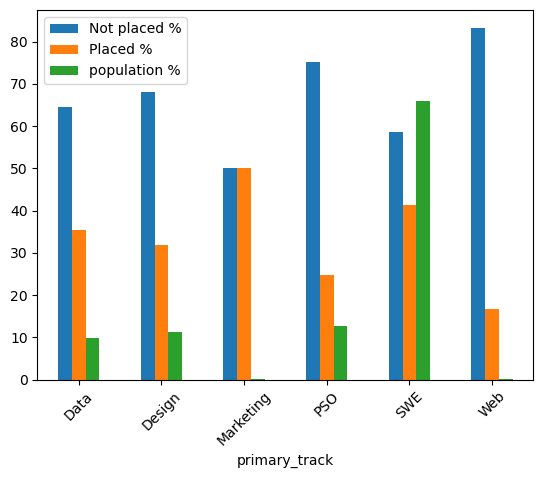

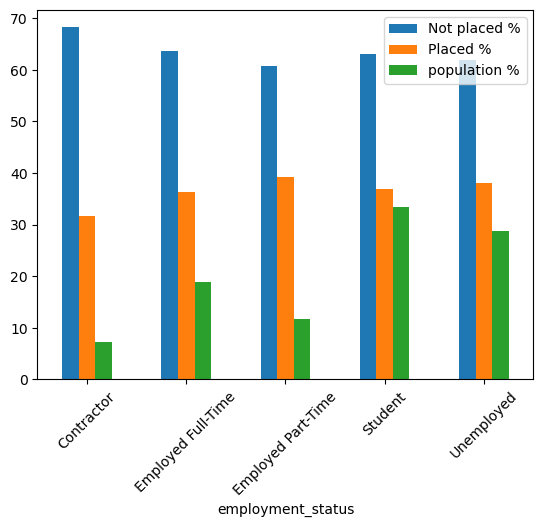

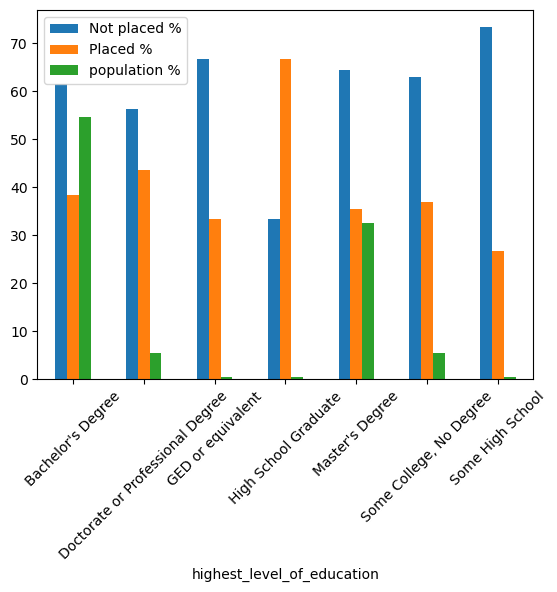

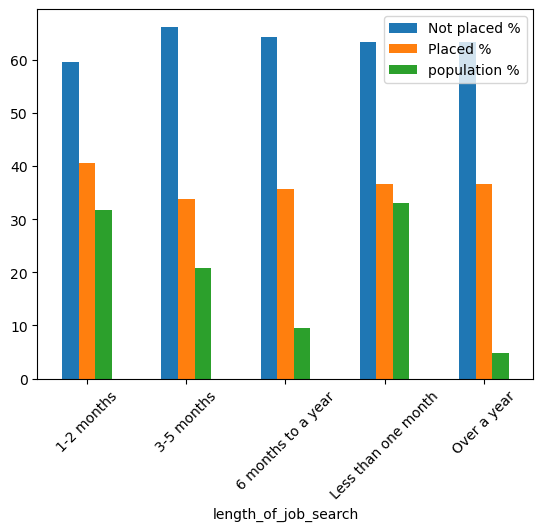

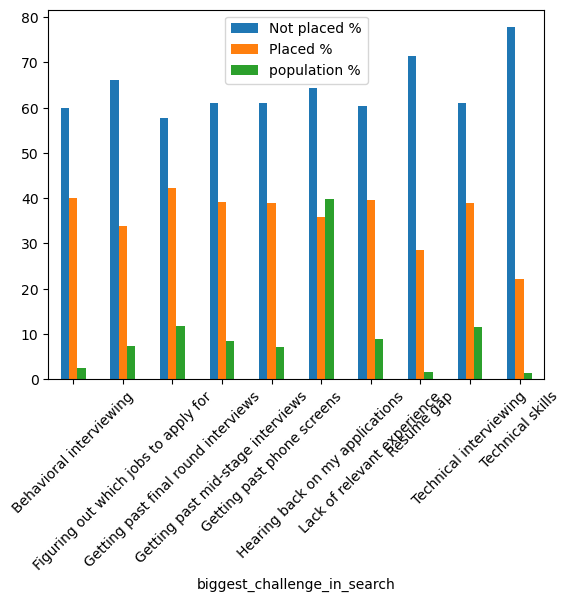

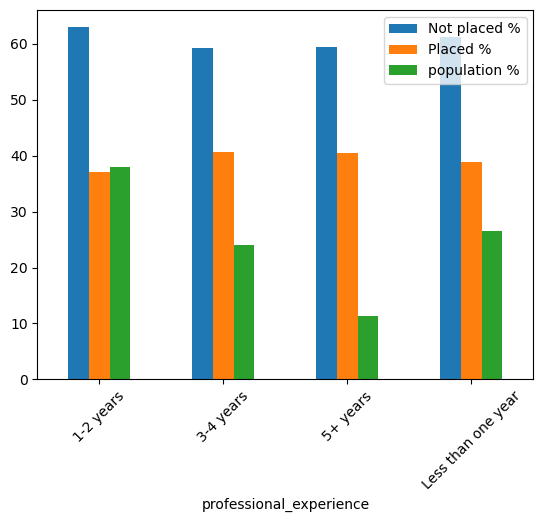

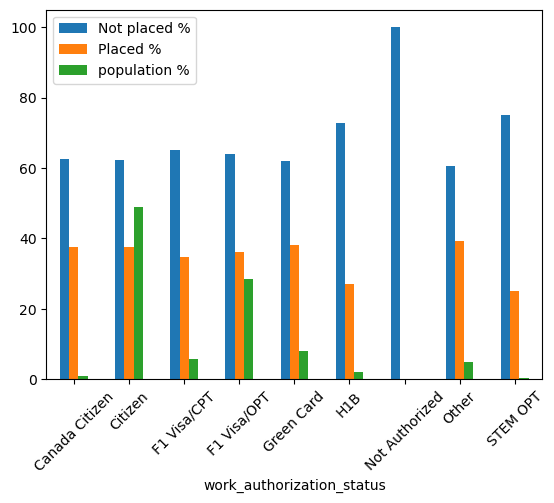

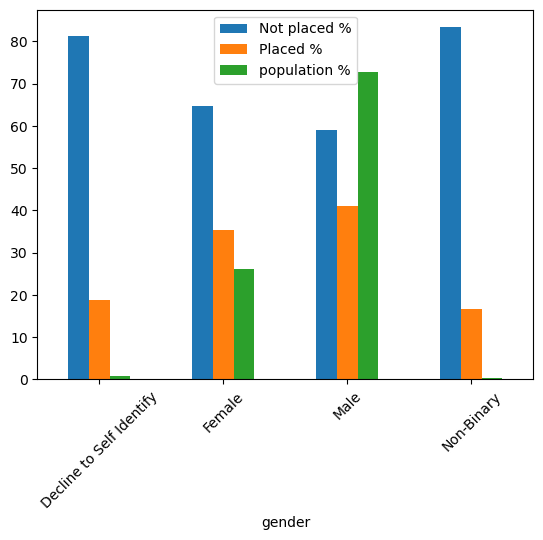

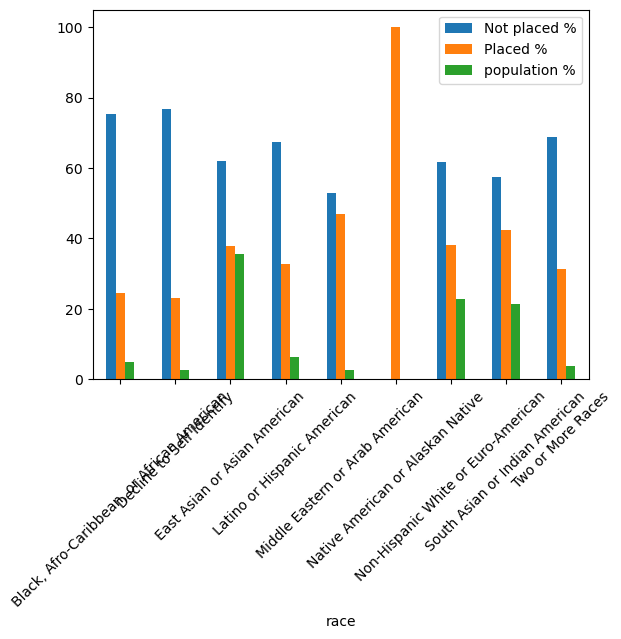

In [13]:
for i,j in enumerate(dic_pivot):
    data=np.round(dic_pivot[j].transpose(),2)
    data.plot.bar()
    plt.xticks(rotation=45)

In [14]:
df.select_dtypes(include='number').columns

Index(['id', 'program_duration_days', 'placed', 'number_of_interviews',
       'number_of_applications'],
      dtype='object')

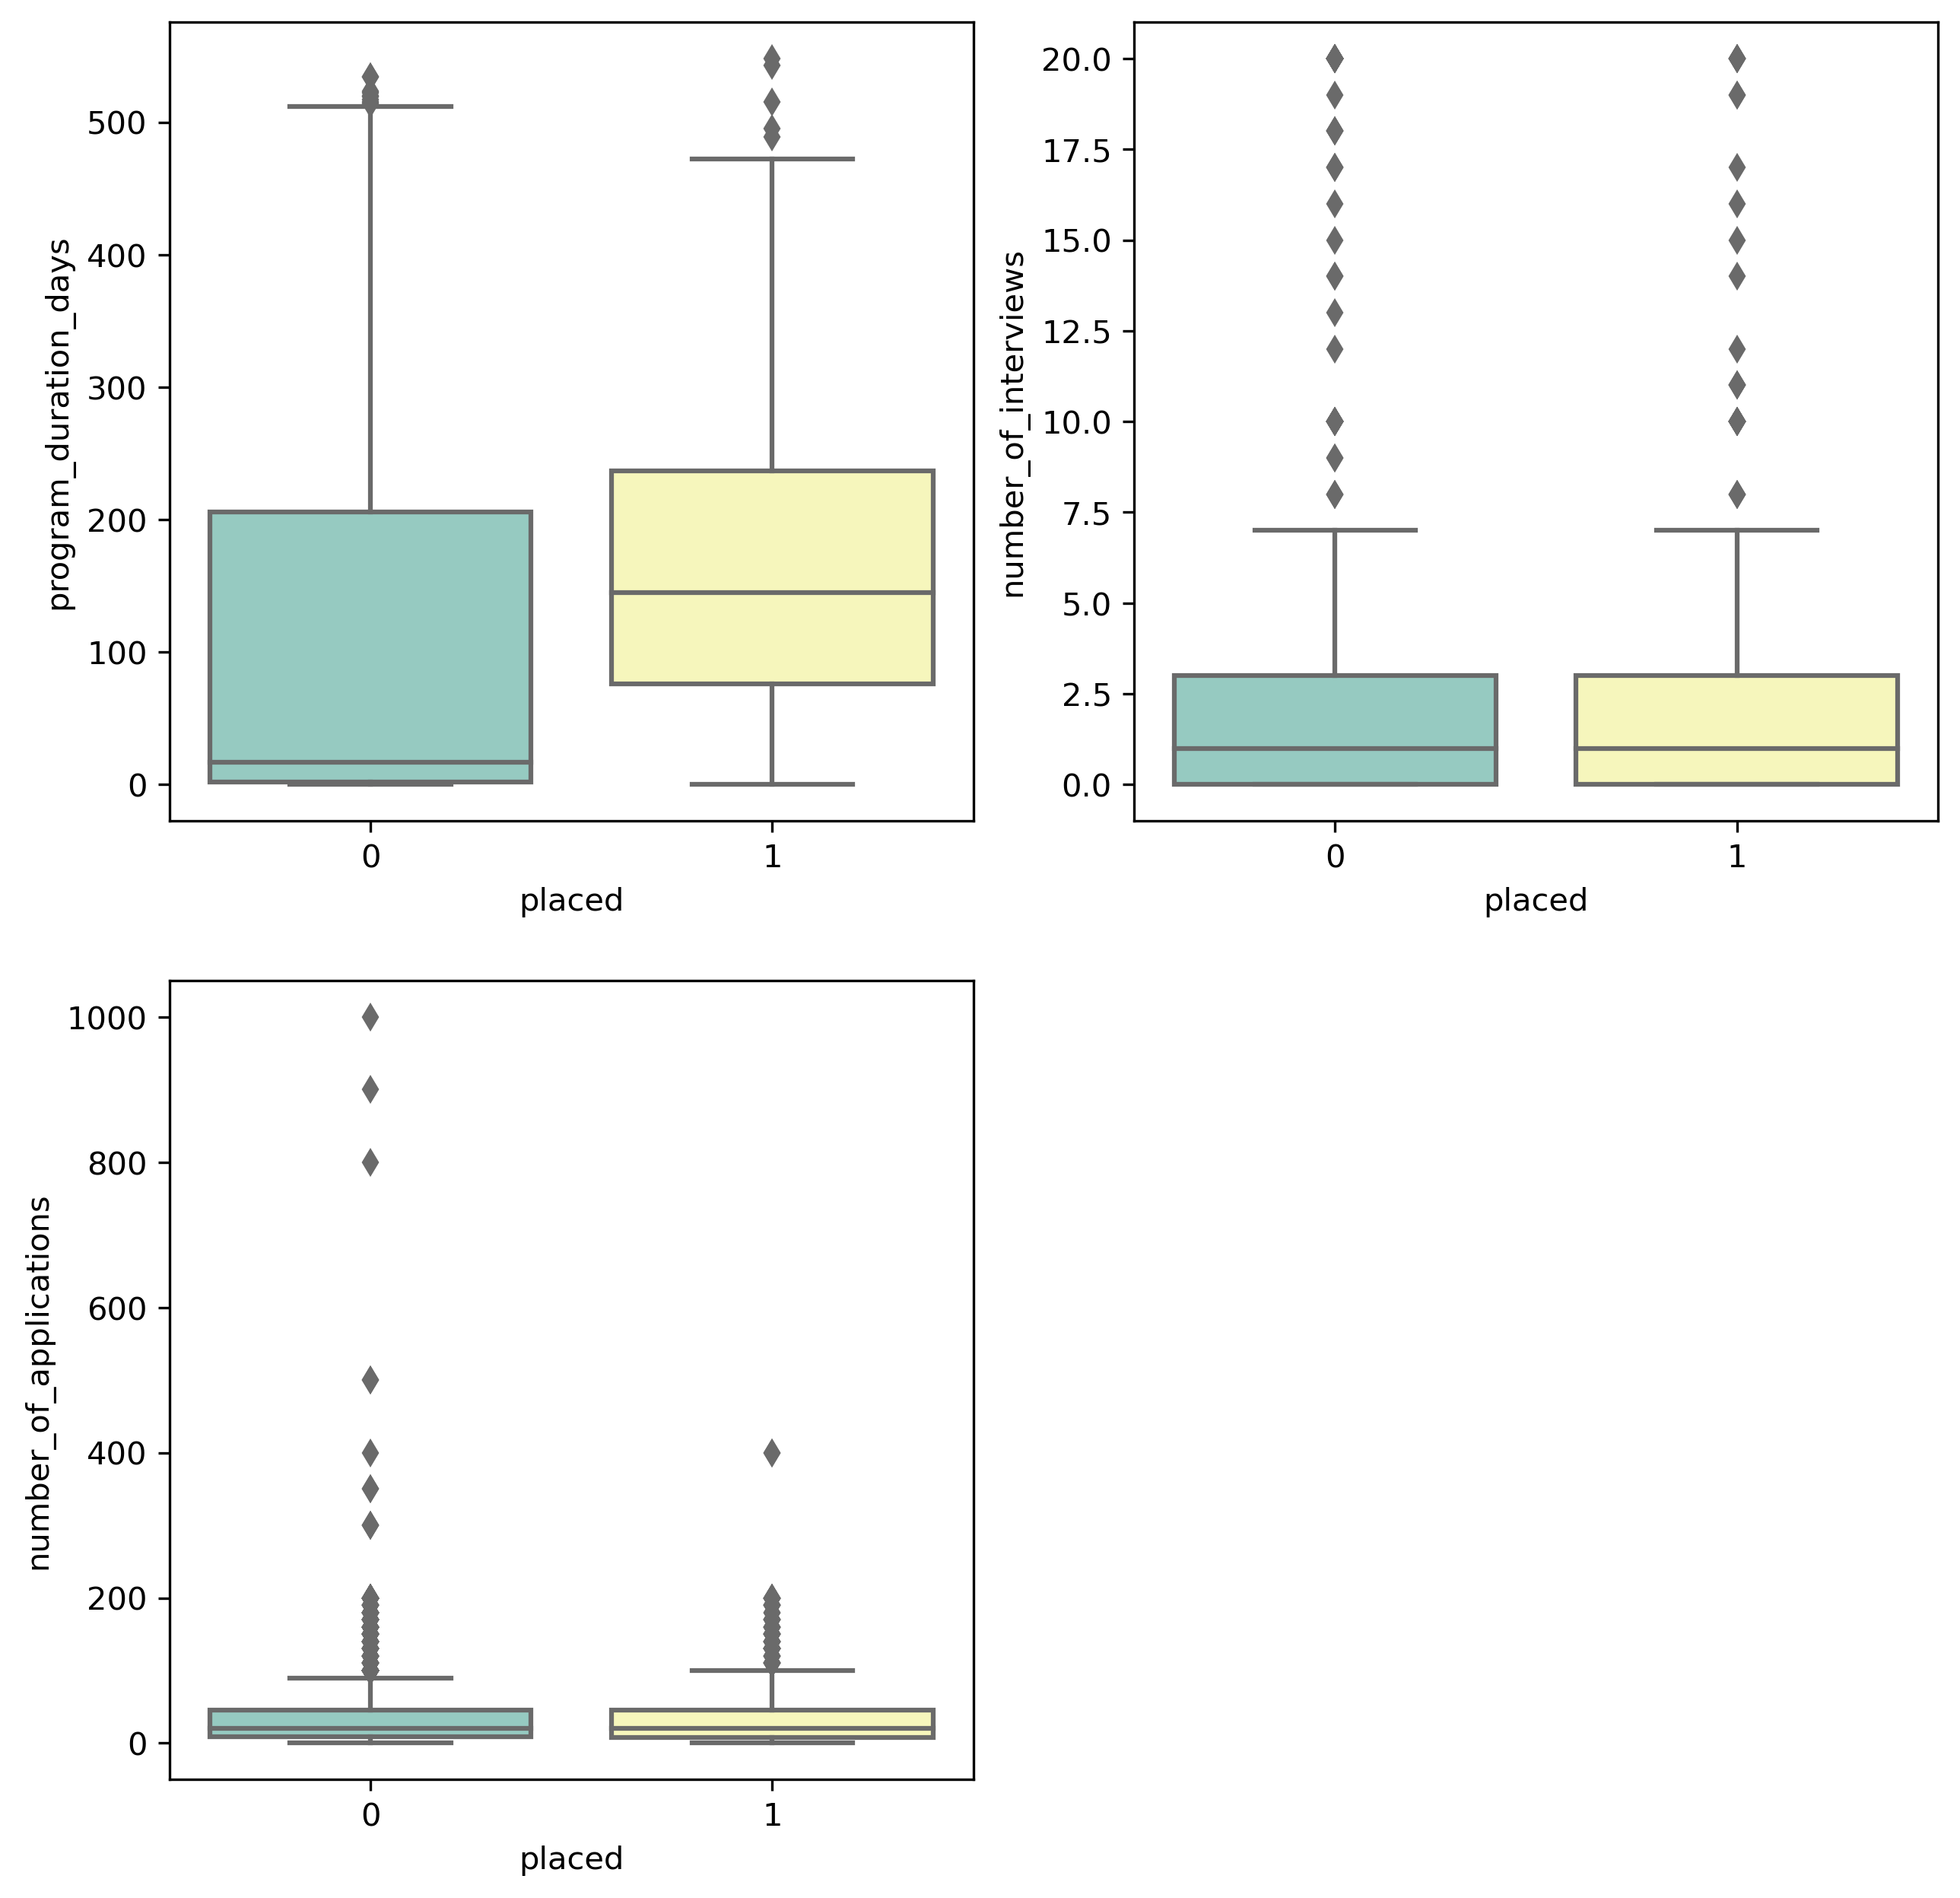

In [15]:
cols_name=['program_duration_days','number_of_interviews','number_of_applications']
plt.figure(figsize=(10,10),dpi=300)
for j,col in enumerate(cols_name):
    plt.subplot(2,2,j+1)
    sns.boxplot(data=df,y=col,x='placed',palette='Set3')

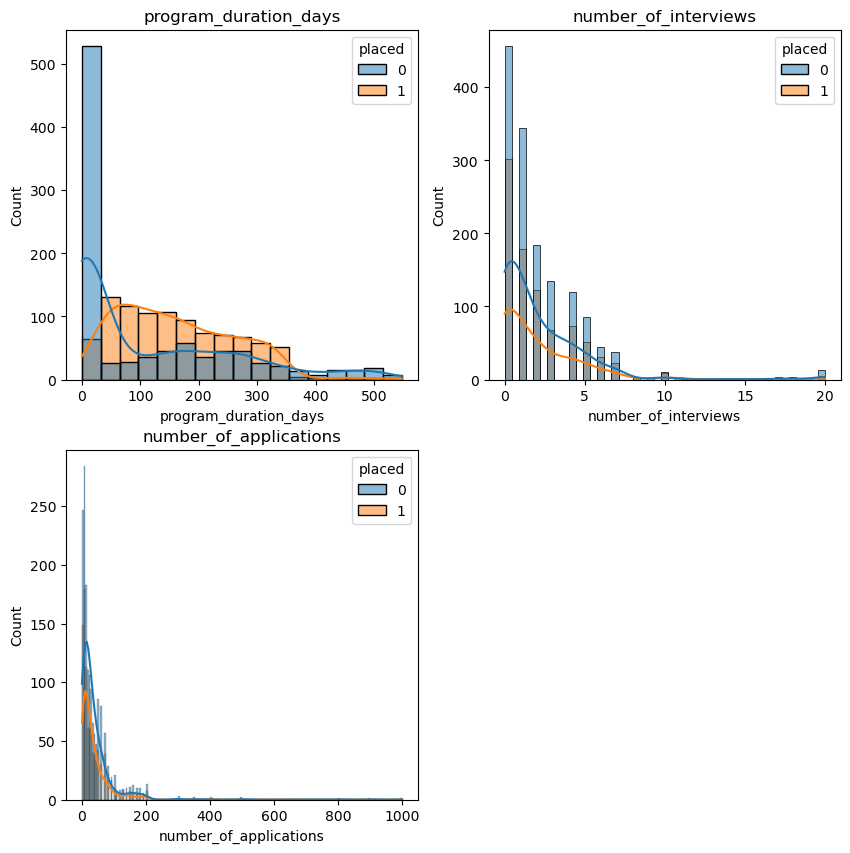

In [16]:
cols_name=['program_duration_days','number_of_interviews','number_of_applications']
plt.figure(figsize=(10,10),dpi=100)
for i,j in enumerate(cols_name):
    plt.subplot(2,2,i+1)
    sns.histplot(data=df,x=j,hue='placed',kde=True)
    plt.title(j)

In [17]:
 df.describe()

id  program_duration_days       placed  number_of_interviews  \
count  2544.000000            1928.000000  2544.000000           2326.000000   
mean   1272.500000             136.098548     0.375786              2.182287   
std     734.533866             125.860248     0.484420              2.959273   
min       1.000000               0.000000     0.000000              0.000000   
25%     636.750000              14.000000     0.000000              0.000000   
50%    1272.500000             112.000000     0.000000              1.000000   
75%    1908.250000             224.000000     1.000000              3.000000   
max    2544.000000             548.000000     1.000000             20.000000   

       number_of_applications  
count             2544.000000  
mean                36.500786  
std                 53.654896  
min                  0.000000  
25%                  9.000000  
50%                 20.000000  
75%                 45.000000  
max               1000.000000

**Cleaning data and Dealing with missing values**

In [18]:
for col in cols_name:
    df_IQR=df[col]
    mean=df[col].mean()
    q1=df_IQR.quantile(0.25)
    q3=df_IQR.quantile(0.75)
    IQR=q3-q1
    upper=df_IQR[df_IQR<=(q3+1.5*IQR)].max()
    lower=df_IQR[df_IQR>=(q1-1.5*IQR)].min()
    df[col]=np.where(df[col]>upper,mean,np.where(df[col]<lower,mean,df[col]))

df.describe()

id  program_duration_days       placed  number_of_interviews  \
count  2544.000000            1928.000000  2544.000000           2326.000000   
mean   1272.500000             135.673857     0.375786              1.818899   
std     734.533866             125.166513     0.484420              1.901221   
min       1.000000               0.000000     0.000000              0.000000   
25%     636.750000              14.000000     0.000000              0.000000   
50%    1272.500000             112.000000     0.000000              1.000000   
75%    1908.250000             224.000000     1.000000              3.000000   
max    2544.000000             534.000000     1.000000              7.000000   

       number_of_applications  
count             2544.000000  
mean                26.271876  
std                 21.436808  
min                  0.000000  
25%                  9.000000  
50%                 20.000000  
75%                 36.500786  
max                 90.000000

In [19]:
df.shape

(2544, 16)

In [20]:
df = df.drop("id", axis=1)
df

pathrise_status primary_track cohort_tag  program_duration_days  \
0                 Active           SWE     OCT19A                    NaN   
1                 Active           PSO     JAN20A                    NaN   
2            Closed Lost        Design     AUG19B                    0.0   
3            Closed Lost           PSO     AUG19B                    0.0   
4                 Placed           SWE     AUG19A                   89.0   
...                  ...           ...        ...                    ...   
2539  Withdrawn (Failed)        Design     JUN18A                  457.0   
2540  Withdrawn (Failed)          Data     JAN19B                  488.0   
2541              Active           SWE     SEP18C                    NaN   
2542              Active           SWE     MAY18A                    NaN   
2543           Withdrawn           SWE     OCT19A                  285.0   

      placed   employment_status highest_level_of_education  \
0          0          Unemployed          Bachelor's Degree   
1          0          Unemployed    Some College, No Degree   
2          0  Employed Part-Time            Master's Degree   
3          0          Contractor          Bachelor's Degree   
4          1          Unemployed          Bachelor's Degree   
...      ...                 ...                        ...   
2539       0          Contractor            Master's Degree   
2540       0                 NaN            Master's Degree   
2541       0          Contractor          Bachelor's Degree   
2542       0                 NaN            Master's Degree   
2543       0             Student            Master's Degree   

     length_of_job_search           biggest_challenge_in_search  \
0              3-5 months       Hearing back on my applications   
1              3-5 months   Getting past final round interviews   
2     Less than one month  Figuring out which jobs to apply for   
3     Less than one month   Getting past final round interviews   
4              1-2 months       Hearing back on my applications   
...                   ...                                   ...   
2539   6 months to a year                Technical interviewing   
2540           3-5 months       Hearing back on my applications   
2541  Less than one month                Technical interviewing   
2542  Less than one month                Technical interviewing   
2543           1-2 months       Hearing back on my applications   

     professional_experience work_authorization_status  number_of_interviews  \
0                  3-4 years            Canada Citizen              2.000000   
1                  1-2 years                   Citizen              6.000000   
2         Less than one year                   Citizen              0.000000   
3         Less than one year                   Citizen              5.000000   
4                  1-2 years               F1 Visa/OPT              2.182287   
...                      ...                       ...                   ...   
2539                5+ years                   Citizen              4.000000   
2540               1-2 years               F1 Visa/OPT              1.000000   
2541               1-2 years                   Citizen              1.000000   
2542               1-2 years                   Citizen              2.000000   
2543               1-2 years                Green Card              3.000000   

      number_of_applications  gender                                 race  
0                  36.500786    Male  Non-Hispanic White or Euro-American  
1                   0.000000    Male  Non-Hispanic White or Euro-American  
2                   0.000000    Male         East Asian or Asian American  
3                  25.000000    Male             Decline to Self Identify  
4                  36.500786    Male         East Asian or Asian American  
...                      ...     ...                                  ...  
2539               15.000000    Male  Non

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2544 non-null   object 
 1   primary_track                2544 non-null   object 
 2   cohort_tag                   2536 non-null   object 
 3   program_duration_days        1928 non-null   float64
 4   placed                       2544 non-null   int64  
 5   employment_status            2315 non-null   object 
 6   highest_level_of_education   2486 non-null   object 
 7   length_of_job_search         2470 non-null   object 
 8   biggest_challenge_in_search  2520 non-null   object 
 9   professional_experience      2322 non-null   object 
 10  work_authorization_status    2260 non-null   object 
 11  number_of_interviews         2326 non-null   float64
 12  number_of_applications       2544 non-null   float64
 13  gender            

In [22]:
df.drop(df[(df['pathrise_status'] == 'Active') | (df['pathrise_status'] == 'Deferred')].index, axis=0, inplace=True)
df.drop(df[(df['pathrise_status'] == 'MIA') | (df['pathrise_status'] == 'Break')].index, axis=0,  inplace=True)

In [23]:
df.shape

(1894, 15)

In [24]:
df.drop(['cohort_tag','pathrise_status'] ,axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 2 to 2543
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1894 non-null   object 
 1   program_duration_days        1894 non-null   float64
 2   placed                       1894 non-null   int64  
 3   employment_status            1717 non-null   object 
 4   highest_level_of_education   1854 non-null   object 
 5   length_of_job_search         1829 non-null   object 
 6   biggest_challenge_in_search  1874 non-null   object 
 7   professional_experience      1738 non-null   object 
 8   work_authorization_status    1674 non-null   object 
 9   number_of_interviews         1723 non-null   float64
 10  number_of_applications       1894 non-null   float64
 11  gender                       1527 non-null   object 
 12  race                         1881 non-null   object 
dtypes: float64(3), int

In [25]:
df.isnull().sum().sort_values(ascending=False)

gender                         367
work_authorization_status      220
employment_status              177
number_of_interviews           171
professional_experience        156
length_of_job_search            65
highest_level_of_education      40
biggest_challenge_in_search     20
race                            13
primary_track                    0
program_duration_days            0
placed                           0
number_of_applications           0
dtype: int64

In [26]:
df['gender'].value_counts()

Male                        1114
Female                       400
Decline to Self Identify      10
Non-Binary                     3
Name: gender, dtype: int64

In [27]:
df['gender']=df['gender'].replace(np.nan,'Decline to Self Identify', inplace=True)
df['gender'].value_counts()

Series([], Name: gender, dtype: int64)

In [28]:
df['work_authorization_status'].value_counts()

Citizen           817
F1 Visa/OPT       478
Green Card        138
F1 Visa/CPT        96
Other              80
H1B                36
Canada Citizen     20
STEM OPT            5
Not Authorized      4
Name: work_authorization_status, dtype: int64

In [29]:
df['work_authorization_status']=df['work_authorization_status'].replace(np.nan,'Citizen',inplace=True )
df['work_authorization_status'].value_counts()

Series([], Name: work_authorization_status, dtype: int64)

In [30]:
df['employment_status'].value_counts()

Student               567
Unemployed            493
Employed Full-Time    325
Employed Part-Time    199
Contractor            133
Name: employment_status, dtype: int64

In [31]:
df['employment_status'].replace(np.nan, 'Student', inplace=True)

In [32]:
df['employment_status'].value_counts()

Student               744
Unemployed            493
Employed Full-Time    325
Employed Part-Time    199
Contractor            133
Name: employment_status, dtype: int64

In [33]:
df['professional_experience'].value_counts()

1-2 years             630
Less than one year    469
3-4 years             438
5+ years              201
Name: professional_experience, dtype: int64

In [34]:
# Replace missing values in the 'professional_experience' column with new category 'Missed': 
#Replacing missing values with any category may alter the distribution of the data.
df['professional_experience'].fillna('Missed', inplace=True)

# Count the number of occurrences of each value in the 'professional_experience' column
value_counts = df['professional_experience'].value_counts()

In [35]:
df['professional_experience'].value_counts()

1-2 years             630
Less than one year    469
3-4 years             438
5+ years              201
Missed                156
Name: professional_experience, dtype: int64

In [36]:
df['number_of_interviews']

2       0.000000
3       5.000000
4       2.182287
5       5.000000
6       0.000000
          ...   
2535    0.000000
2538    1.000000
2539    4.000000
2540    1.000000
2543    3.000000
Name: number_of_interviews, Length: 1894, dtype: float64

In [37]:
mean_1 = round(df['number_of_interviews'].mean(), 1)
mean_1

1.8

In [38]:
df['number_of_interviews'].replace(np.nan , mean_1 ,inplace=True )
df['number_of_interviews']

2       0.000000
3       5.000000
4       2.182287
5       5.000000
6       0.000000
          ...   
2535    0.000000
2538    1.000000
2539    4.000000
2540    1.000000
2543    3.000000
Name: number_of_interviews, Length: 1894, dtype: float64

In [39]:
df['length_of_job_search'].value_counts()

Less than one month    610
1-2 months             594
3-5 months             368
6 months to a year     169
Over a year             88
Name: length_of_job_search, dtype: int64

In [40]:
df['length_of_job_search'].fillna('missed',  inplace=True)

In [41]:
df['highest_level_of_education'].value_counts()

Bachelor's Degree                   1015
Master's Degree                      599
Some College, No Degree              101
Doctorate or Professional Degree     100
GED or equivalent                     14
Some High School                      13
High School Graduate                  12
Name: highest_level_of_education, dtype: int64

In [42]:
df['highest_level_of_education'].fillna('missed', inplace=True)

In [43]:
df['biggest_challenge_in_search'].value_counts()

Hearing back on my applications         724
Getting past final round interviews     232
Technical interviewing                  219
Lack of relevant experience             173
Getting past mid-stage interviews       158
Getting past phone screens              142
Figuring out which jobs to apply for    129
Behavioral interviewing                  42
Resume gap                               30
Technical skills                         25
Name: biggest_challenge_in_search, dtype: int64

In [44]:
df['biggest_challenge_in_search'].fillna('missed', inplace=True)

In [45]:
df['race'].value_counts()

East Asian or Asian American                  690
South Asian or Indian American                414
Non-Hispanic White or Euro-American           407
Latino or Hispanic American                   119
Black, Afro-Caribbean, or African American     85
Two or More Races                              67
Middle Eastern or Arab American                52
Decline to Self Identify                       44
Native American or Alaskan Native               3
Name: race, dtype: int64

In [46]:
df['race']= df['race'].replace(np.nan , "Decline to Self Identify")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 2 to 2543
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1894 non-null   object 
 1   program_duration_days        1894 non-null   float64
 2   placed                       1894 non-null   int64  
 3   employment_status            1894 non-null   object 
 4   highest_level_of_education   1894 non-null   object 
 5   length_of_job_search         1894 non-null   object 
 6   biggest_challenge_in_search  1894 non-null   object 
 7   professional_experience      1894 non-null   object 
 8   work_authorization_status    0 non-null      object 
 9   number_of_interviews         1894 non-null   float64
 10  number_of_applications       1894 non-null   float64
 11  gender                       0 non-null      object 
 12  race                         1894 non-null   object 
dtypes: float64(3), int

In [48]:
df_categorical_to_dummies = pd.get_dummies(df[['primary_track','employment_status', 'highest_level_of_education', 'length_of_job_search','biggest_challenge_in_search','professional_experience','gender','race','work_authorization_status' ]])

In [49]:
df = df.drop(['primary_track','employment_status', 'highest_level_of_education', 'length_of_job_search','biggest_challenge_in_search','professional_experience','gender','race','work_authorization_status'] , axis=1)

In [50]:
df = pd.concat([df,df_categorical_to_dummies], axis=1)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 2 to 2543
Data columns (total 54 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   program_duration_days                                             1894 non-null   float64
 1   placed                                                            1894 non-null   int64  
 2   number_of_interviews                                              1894 non-null   float64
 3   number_of_applications                                            1894 non-null   float64
 4   primary_track_Data                                                1894 non-null   uint8  
 5   primary_track_Design                                              1894 non-null   uint8  
 6   primary_track_Marketing                                           1894 non-null   uint8  
 7   primary_track_PSO                

In [53]:
df1=df
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 2 to 2543
Data columns (total 54 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   program_duration_days                                             1894 non-null   float64
 1   placed                                                            1894 non-null   int64  
 2   number_of_interviews                                              1894 non-null   float64
 3   number_of_applications                                            1894 non-null   float64
 4   primary_track_Data                                                1894 non-null   uint8  
 5   primary_track_Design                                              1894 non-null   uint8  
 6   primary_track_Marketing                                           1894 non-null   uint8  
 7   primary_track_PSO                

<Axes: xlabel='placed', ylabel='count'>

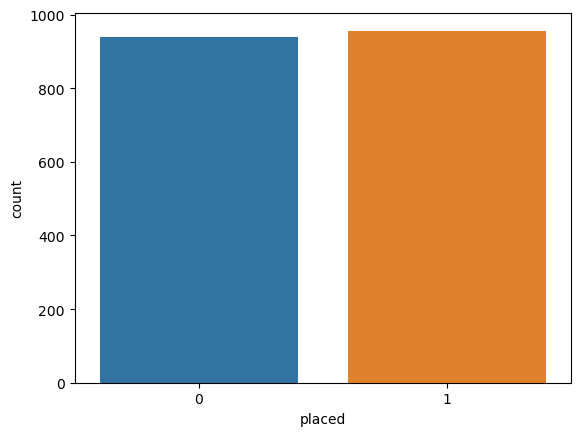

In [54]:
sns.countplot(x='placed',data=df)

In [55]:
df.reset_index(drop=True,inplace=True)
x=df.drop('placed',axis=1)
y=df['placed']
x_cols=x.columns
transform=preprocessing.StandardScaler()
x_scale=transform.fit_transform(x)
x_final=pd.DataFrame(x_scale,columns=x_cols)
df_final=pd.concat([x_final,y],axis=1)

In [56]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 54 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   program_duration_days                                             1894 non-null   float64
 1   number_of_interviews                                              1894 non-null   float64
 2   number_of_applications                                            1894 non-null   float64
 3   primary_track_Data                                                1894 non-null   float64
 4   primary_track_Design                                              1894 non-null   float64
 5   primary_track_Marketing                                           1894 non-null   float64
 6   primary_track_PSO                                                 1894 non-null   float64
 7   primary_track_SWE                

In [57]:
def plot_confusion_matrix (y,y_predicted,model_name):
    cm=confusion_matrix(y,y_predicted)
    sns.heatmap(data=cm,annot=True,xticklabels=['Not placed','Placed'],yticklabels=['Not Placed','Placed'],cmap='crest')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual Lablels')
    plt.title('Confusion Matrix for {} model'.format(model_name))

In [58]:
x=df_final.drop('placed',axis=1)
y=df_final['placed']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [59]:
lr=LogisticRegression()
svc=SVC()
dt=tree.DecisionTreeClassifier()
knn=KNeighborsClassifier()


List_Model=[lr,svc,dt,knn]

lr_param={'C':[0.01,0.1,1],'solver':['lbfgs'],'penalty':['l2']}
svc_param={'C':[0.5,1,1.5],'kernel':['linear','rbf','poly','sigmoid']}
dt_param={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[2*n for n in range(1,10)],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}#'max_features':['auto'],'sqrt']}
knn_param={'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}

param={lr:lr_param,svc:svc_param,dt:dt_param,knn:knn_param}

list_modle_name={lr:'Logistic Regression',svc:'Support Vector Machine',dt:'Decision Tree Classifier',knn:'K Nearest Neighbor' }
acc_success={}
acc_fail={}
best_param={}

In [60]:



file_path = ''  # or file_path = './'
df_param=pd.DataFrame(param)
df_param.to_excel(file_path+'Hyper_parameters.xlsx')


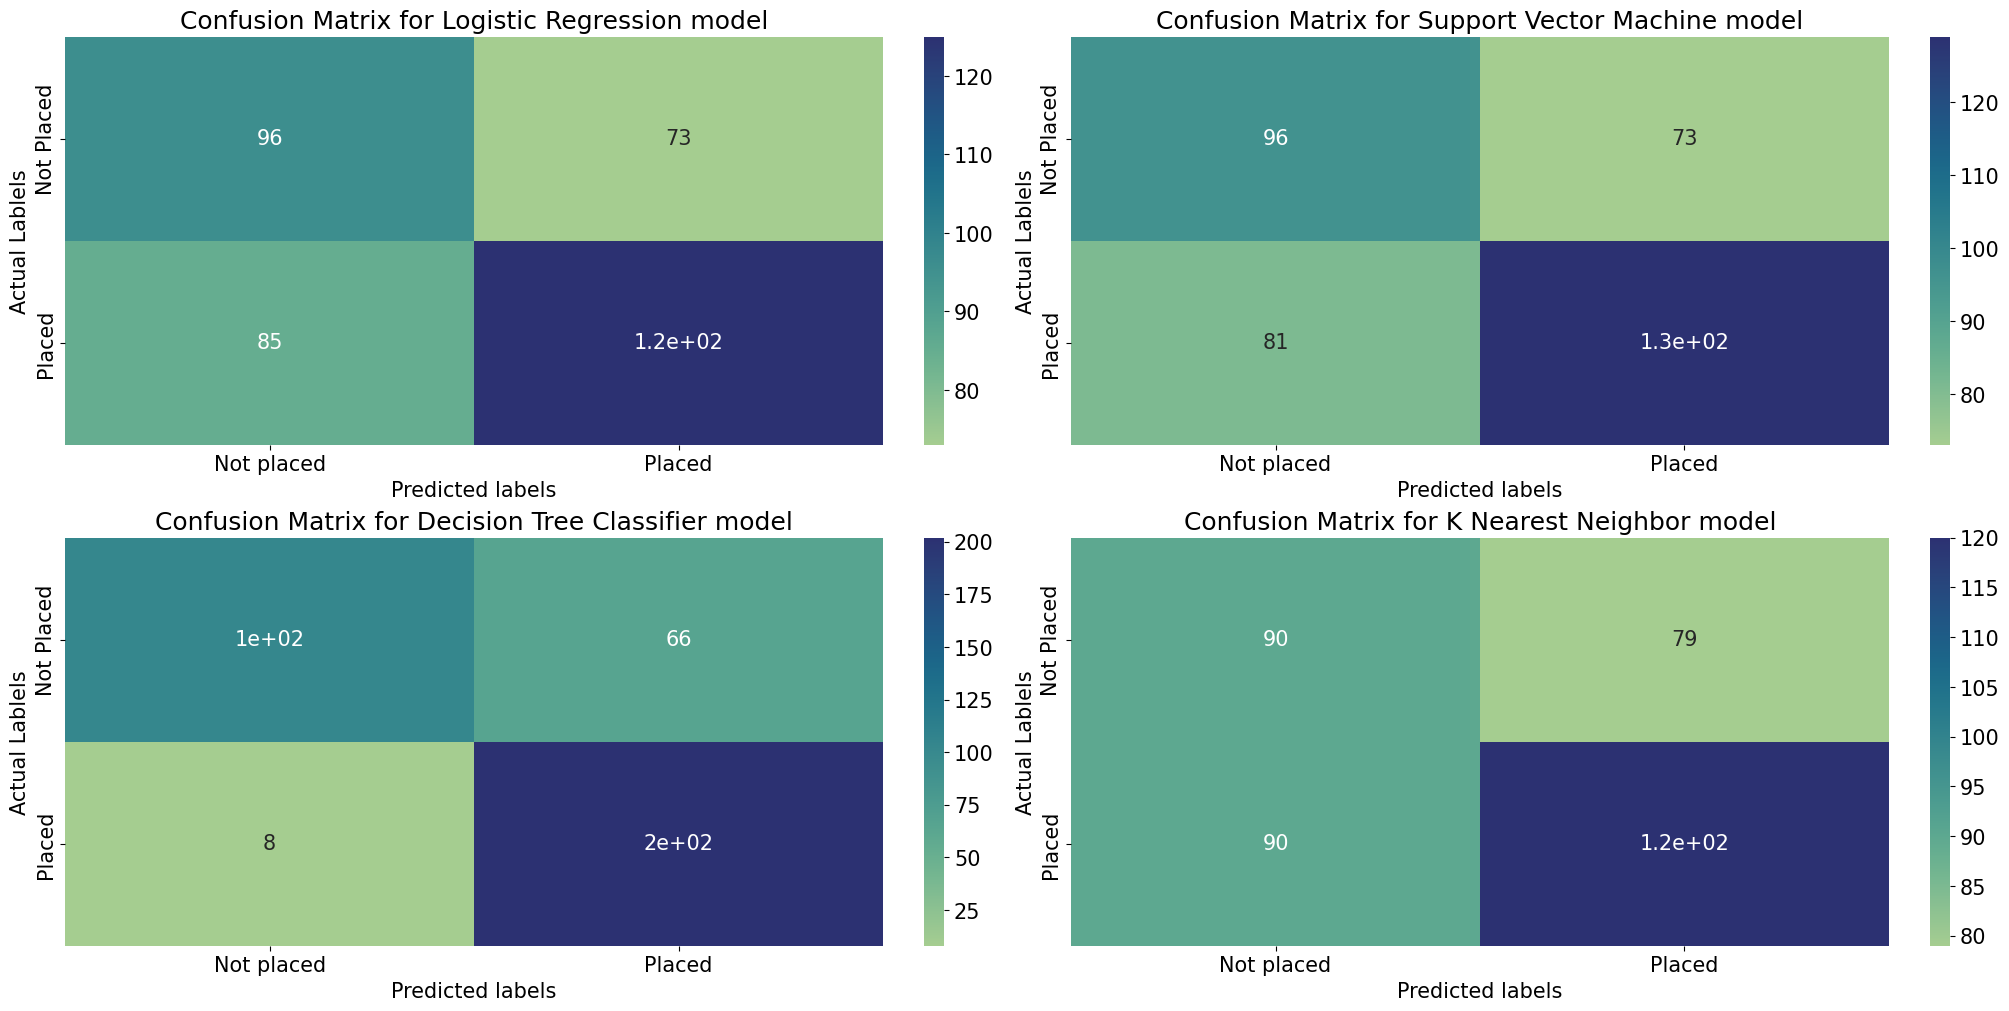

In [61]:
plt.figure(figsize=(20,10),dpi=100,layout='constrained')
font={'size':15}
for i,m in enumerate(List_Model):
    Model_cv=GridSearchCV(m,param[m],cv=4)
    Model_cv.fit(x_train,y_train)
    y_predict=Model_cv.predict(x_test)
    cr=classification_report(y_test,y_predict ,output_dict=True)
    cr['1'].update({'accuracy':cr['accuracy']})
    cr['0'].update({'accuracy':cr['accuracy']})
    acc_success[list_modle_name[m]]=cr['1']
    acc_fail[list_modle_name[m]]=cr['0']
    plt.rc('font',**font)
    plt.subplot(2,2,i+1)
    plot_confusion_matrix(y_test,y_predict,list_modle_name[m])
    best_param[list_modle_name[m]]=Model_cv.best_params_

plt.rcdefaults()


In [62]:
df_acc_success=np.round(pd.DataFrame(acc_success),2)
df_acc_success=df_acc_success.drop('support',axis=0)
df_acc_success.to_excel(file_path+'acc_success.xlsx')
df_acc_success

Logistic Regression  Support Vector Machine  \
precision                 0.63                    0.64   
recall                    0.60                    0.61   
f1-score                  0.61                    0.63   
accuracy                  0.58                    0.59   

           Decision Tree Classifier  K Nearest Neighbor  
precision                      0.75                0.60  
recall                         0.96                0.57  
f1-score                       0.85                0.59  
accuracy                       0.80                0.55

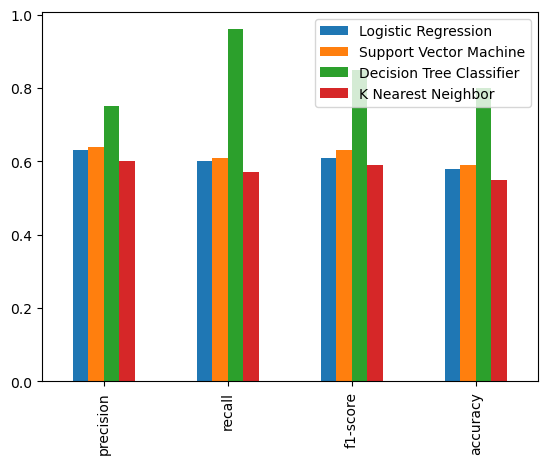

In [63]:
df_acc_success.plot.bar()
fname=file_path+'acc_success_barchart.png'
plt.savefig(fname=fname,dpi=300,bbox_inches='tight',transparent=True)

In [64]:
df_acc_fail=np.round(pd.DataFrame(acc_fail),2)
df_acc_fail=df_acc_fail.drop('support',axis=0)
df_acc_fail.to_excel(file_path+'acc_fail.xlsx')
df_acc_fail

Logistic Regression  Support Vector Machine  \
precision                 0.53                    0.54   
recall                    0.57                    0.57   
f1-score                  0.55                    0.55   
accuracy                  0.58                    0.59   

           Decision Tree Classifier  K Nearest Neighbor  
precision                      0.93                0.50  
recall                         0.61                0.53  
f1-score                       0.74                0.52  
accuracy                       0.80                0.55

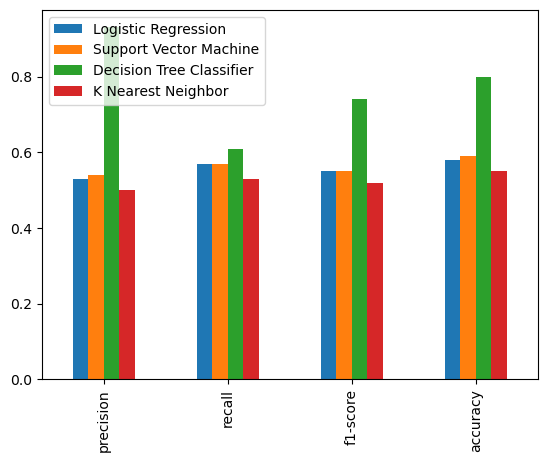

In [65]:
df_acc_fail.plot.bar()
fname=file_path+'acc_fail_barchart.png'
plt.savefig(fname=fname,dpi=300,bbox_inches='tight',transparent=True)

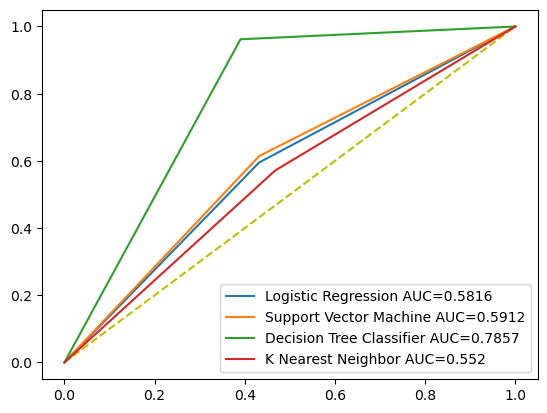

In [66]:
plt.plot([0,1],[0,1],'y--')
for m in List_Model:
    Model_cv=GridSearchCV(m,param[m],cv=4)
    Model_cv.fit(x_train,y_train)
    y_predict=Model_cv.predict(x_test)
    fpr, tpr, thresholds= roc_curve(y_test, y_predict)
    auc = round(roc_auc_score(y_test, y_predict), 4)
    plt.plot(fpr,tpr,label=list_modle_name[m]+' AUC='+str(auc))
    plt.legend()

fname=file_path+'ROC_curve.png'
plt.savefig(fname=fname,dpi=300,bbox_inches='tight',transparent=True)

In [67]:
df_best_param=pd.DataFrame(best_param)
df_best_param.to_excel(file_path+'Best_para.xlsx')
df_best_param

Logistic Regression Support Vector Machine  \
C                                0.01                      1   
penalty                            l2                    NaN   
solver                          lbfgs                    NaN   
kernel                            NaN                 linear   
criterion                         NaN                    NaN   
max_depth                         NaN                    NaN   
min_samples_leaf                  NaN                    NaN   
min_samples_split                 NaN                    NaN   
splitter                          NaN                    NaN   
algorithm                         NaN                    NaN   
n_neighbors                       NaN                    NaN   
p                                 NaN                    NaN   

                  Decision Tree Classifier K Nearest Neighbor  
C                                      NaN                NaN  
penalty                                NaN                NaN  
solver                                 NaN                NaN  
kernel                                 NaN                NaN  
criterion                             gini                NaN  
max_depth                                2                NaN  
min_samples_leaf                         1                NaN  
min_samples_split                        2                NaN  
splitter                              best                NaN  
algorithm                              NaN               auto  
n_neighbors                            NaN                  7  
p                                      NaN                  1

In [68]:
dt_cv=tree.DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=1,min_samples_split=2,splitter='best')
dt_cv.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

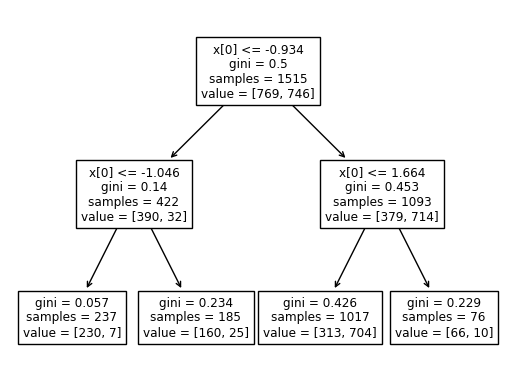

In [69]:
tree.plot_tree(dt_cv)
fname=file_path+'Decision_tree.png'
plt.savefig(fname=fname,dpi=300,bbox_inches='tight',transparent=True)
plt.show()

In [70]:
pickle.dump(dt_cv,open('Pathrise_CM','bw'))

**Regression ML**

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 54 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   program_duration_days                                             1894 non-null   float64
 1   placed                                                            1894 non-null   int64  
 2   number_of_interviews                                              1894 non-null   float64
 3   number_of_applications                                            1894 non-null   float64
 4   primary_track_Data                                                1894 non-null   uint8  
 5   primary_track_Design                                              1894 non-null   uint8  
 6   primary_track_Marketing                                           1894 non-null   uint8  
 7   primary_track_PSO                

In [72]:
df_reg=df1[df1['placed']==1]
df_reg=df_reg.drop('placed',axis=1)
df_reg.reset_index(drop=True,inplace=True)
x=df_reg.drop('program_duration_days',axis=1)
y=df_reg['program_duration_days']
x_cols=x.columns
x_scale=transform.fit_transform(x)
x_final=pd.DataFrame(x_scale,columns=x_cols)
df_final=pd.concat([x_final,y],axis=1)

In [73]:
df_final.to_excel('Pathrise_MLR_dataset.xlsx',index=False)

In [74]:
df_final.describe()

number_of_interviews  number_of_applications  primary_track_Data  \
count            956.000000            9.560000e+02        9.560000e+02   
mean               0.000000            3.158794e-17        2.972982e-17   
std                1.000523            1.000523e+00        1.000523e+00   
min               -0.981169           -1.193889e+00       -3.184062e-01   
25%               -0.981169           -8.307182e-01       -3.184062e-01   
50%               -0.436867           -2.859617e-01       -3.184062e-01   
75%                0.651737            4.631142e-01       -3.184062e-01   
max                2.828944            2.891785e+00        3.140643e+00   

       primary_track_Design  primary_track_Marketing  primary_track_PSO  \
count          9.560000e+02             9.560000e+02       9.560000e+02   
mean          -1.114868e-17             1.114868e-17      -1.486491e-17   
std            1.000523e+00             1.000523e+00       1.000523e+00   
min           -3.263150e-01            -3.235924e-02      -3.021989e-01   
25%           -3.263150e-01            -3.235924e-02      -3.021989e-01   
50%           -3.263150e-01            -3.235924e-02      -3.021989e-01   
75%           -3.263150e-01            -3.235924e-02      -3.021989e-01   
max            3.064524e+00             3.090307e+01       3.309078e+00   

       primary_track_SWE  primary_track_Web  employment_status_Contractor  \
count       9.560000e+02       9.560000e+02                  9.560000e+02   
mean       -1.486491e-16       1.486491e-17                  3.158794e-17   
std         1.000523e+00       1.000523e+00                  1.000523e+00   
min        -1.627530e+00      -3.235924e-02                 -2.446773e-01   
25%        -1.627530e+00      -3.235924e-02                 -2.446773e-01   
50%         6.144279e-01      -3.235924e-02                 -2.446773e-01   
75%         6.144279e-01      -3.235924e-02                 -2.446773e-01   
max         6.144279e-01       3.090307e+01                  4.087016e+00   

       employment_status_Employed Full-Time  ...  \
count                          9.560000e+02  ...   
mean                           4.459473e-17  ...   
std                            1.000523e+00  ...   
min                           -4.449663e-01  ...   
25%                           -4.449663e-01  ...   
50%                           -4.449663e-01  ...   
75%                           -4.449663e-01  ...   
max                            2.247361e+00  ...   

       race_Black, Afro-Caribbean, or African American  \
count                                     9.560000e+02   
mean                                      8.547324e-17   
std                                       1.000523e+00   
min                                      -1.830670e-01   
25%                                      -1.830670e-01   
50%                                      -1.830670e-01   
75%                                      -1.830670e-01   
max                                       5.462482e+00   

       race_Decline to Self Identify  race_East Asian or Asian American  \
count                   9.560000e+02                       9.560000e+02   
mean                    2.972982e-17                       4.087850e-17   
std                     1.000523e+00                       1.000523e+00   
min                    -1.534751e-01                      -7.446285e-01   
25%                    -1.534751e-01                      -7.446285e-01   
50%                    -1.534751e-01                      -7.446285e-01   
75%                    -1.534751e-01                       1.342952e+00   
max                     6.515715e+00                       1.342952e+00   

       race_Latino or Hispanic American  race_Middle Eastern or Arab American  \
count                      9.560000e+02                          9.560000e+02   
mean                      -6.689210e-17                          8.082795e-17   
std                        1.000523e+00           

<Axes: xlabel='program_duration_days', ylabel='Count'>

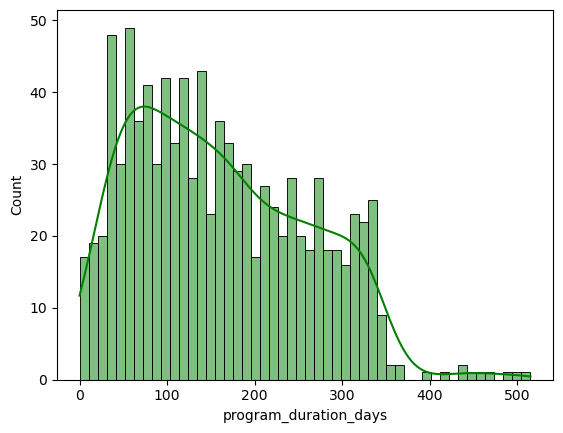

In [75]:
sns.histplot(data=df_final,x='program_duration_days',bins=50,kde=True,color='green')

In [76]:
x=df_final.drop('program_duration_days',axis=1)
y=df_final['program_duration_days']

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [78]:
lreg=LinearRegression()
dtr=tree.DecisionTreeRegressor(max_depth=2)
svr=SVR(kernel='poly',degree=3,C=0.1)
model=[lreg,dtr,svr]
list_modle_name={lreg:'Linear Regression',svr:'Support Vector Regression',dtr:'Decision Tree Regression'}
metrics={}

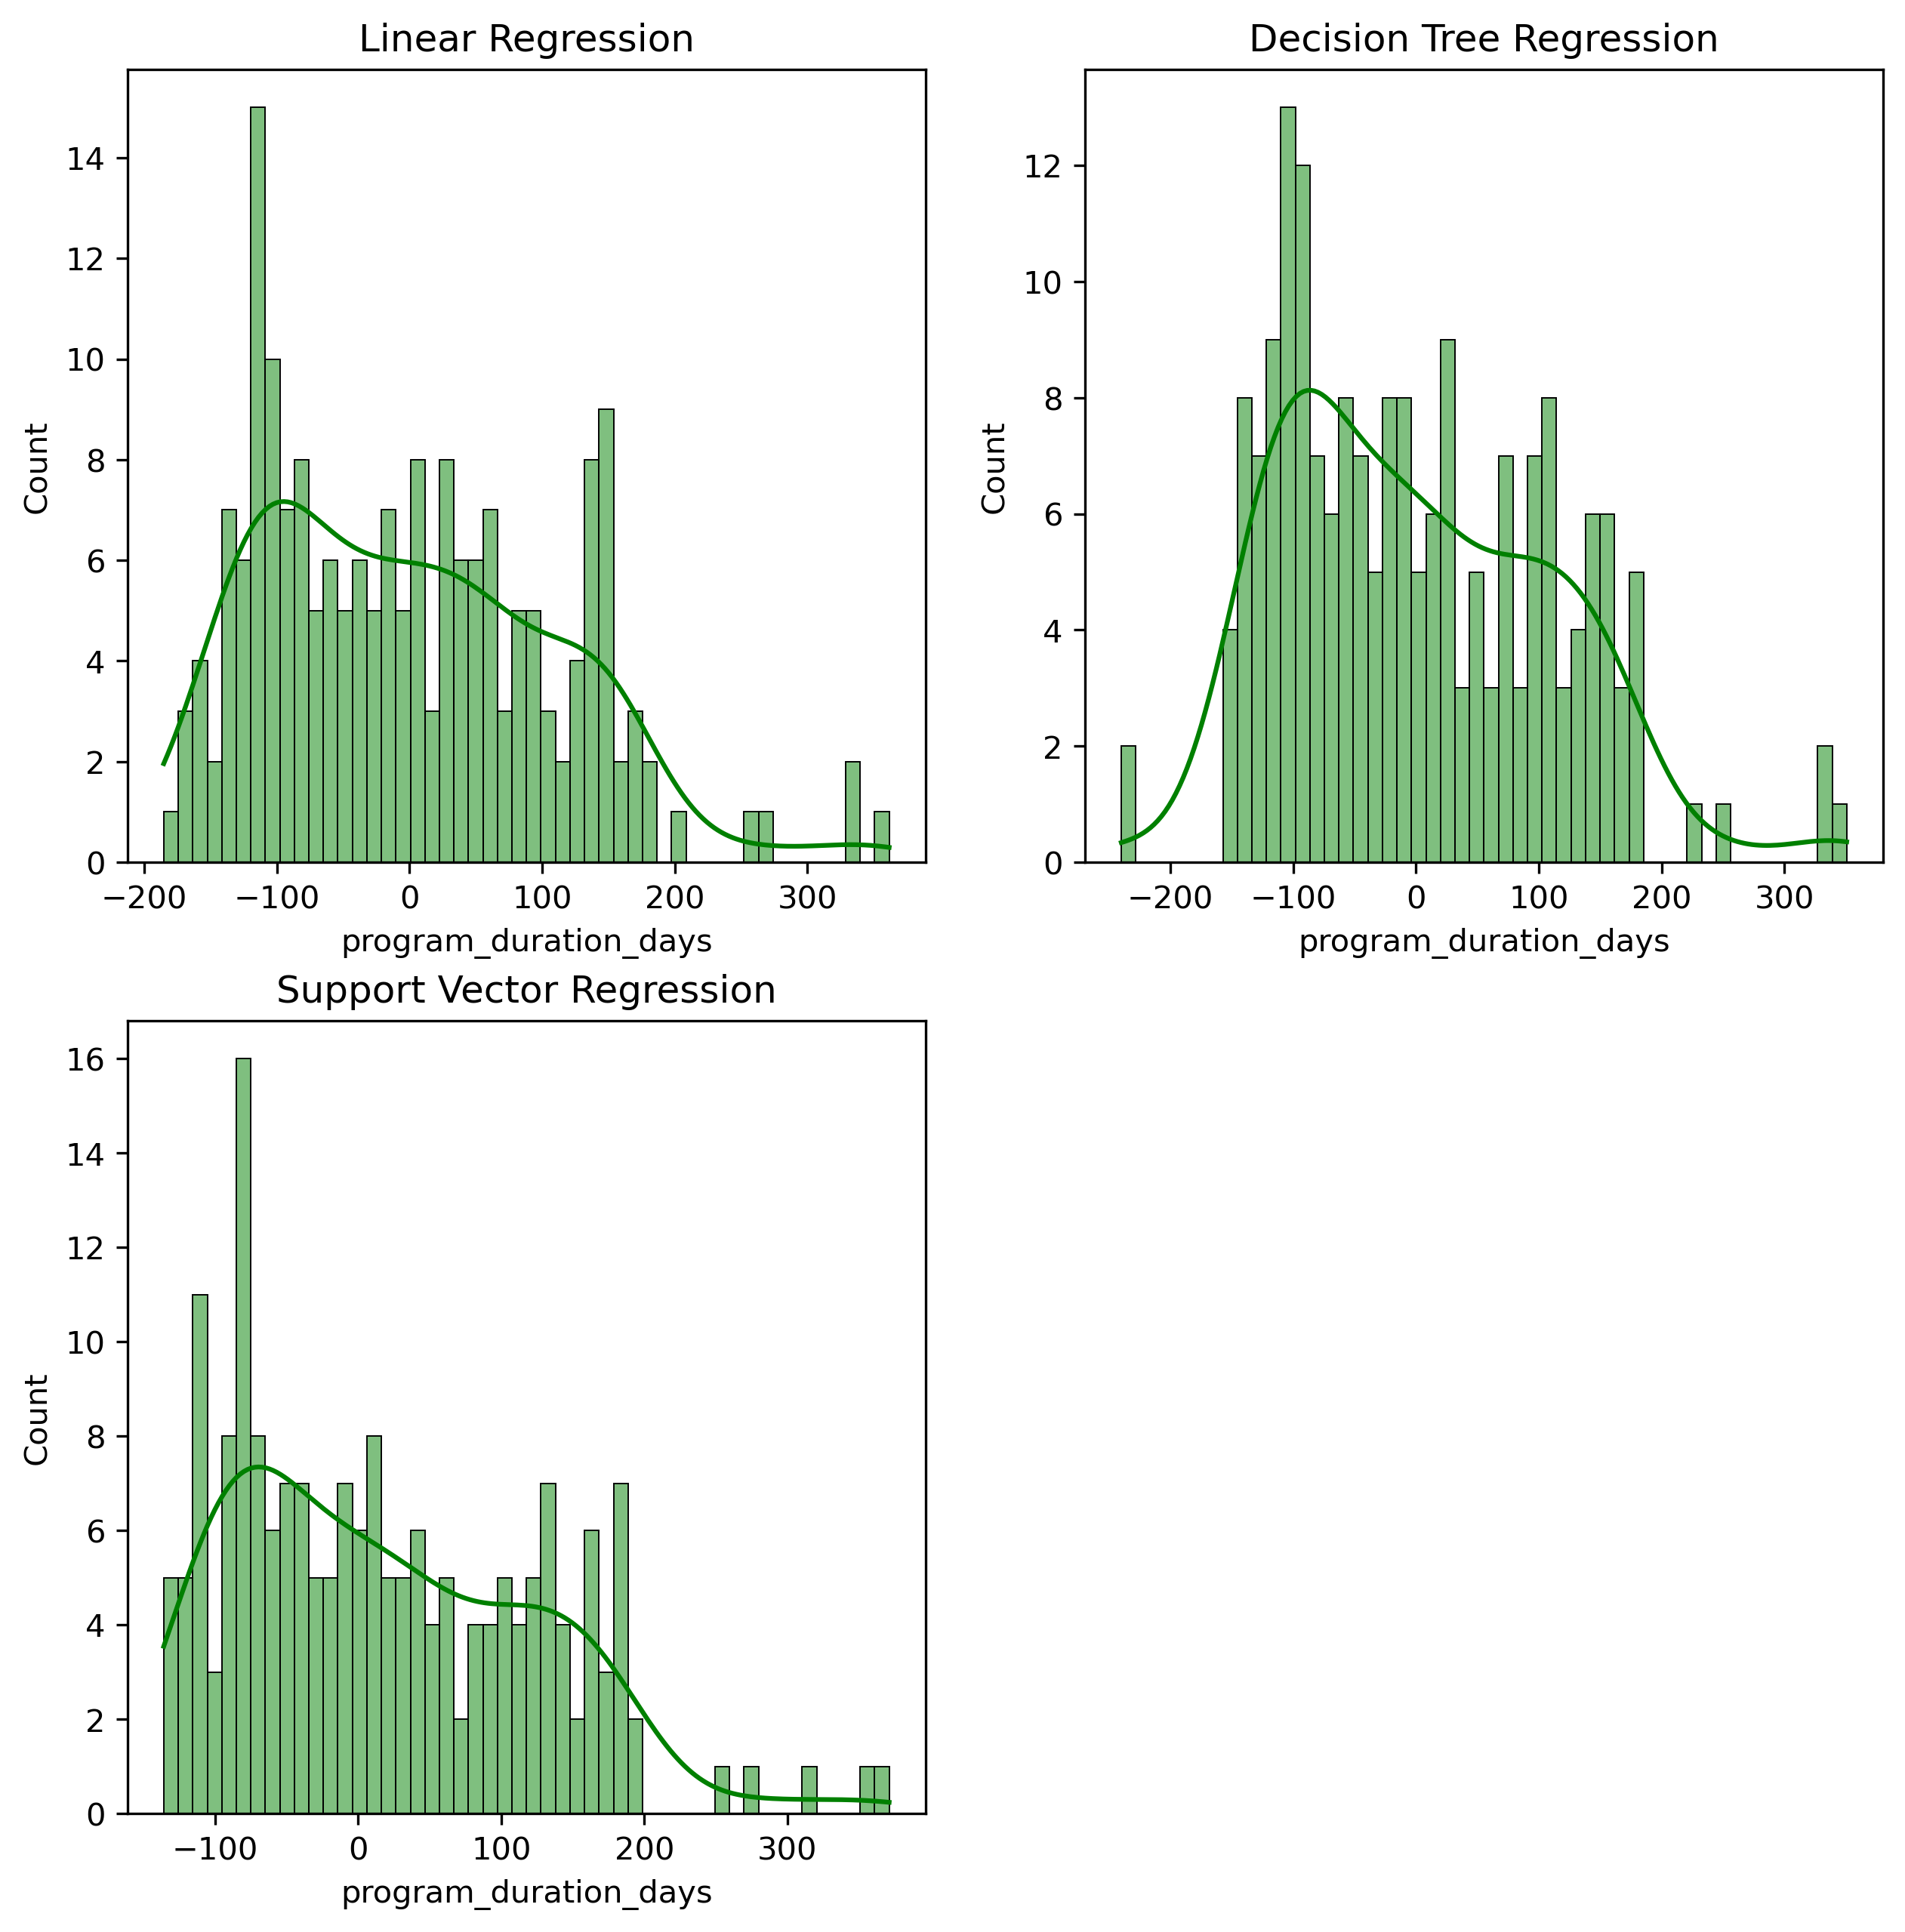

In [82]:
plt.figure(figsize=(10,10),dpi=300)
for i,ml in enumerate(model):
    ml.fit(x_train,y_train)
    y_p=ml.predict(x_test)
    metrics[list_modle_name[ml]]={'MAE':mean_absolute_error(y_test,y_p),'MSE':mean_squared_error(y_test,y_p),'RMSE':np.sqrt(mean_squared_error(y_test,y_p))}
    plt.subplot(2,2,i+1)
    residual=y_test-y_p
    sns.histplot(x=residual,bins=50,kde=True,color='green')
    plt.title(list_modle_name[ml])

In [84]:
font={'size':15}
for ml in model:
    ml.fit(x_train,y_train)
    y_p=ml.predict(x_test)
    residual=y_test-y_p
    plt.rc('font',**font)
    sns.histplot(x=residual,bins=50,kde=True,color='green')
    plt.title(list_modle_name[ml])
    
    plt.close()
plt.rcdefaults()

In [85]:
df_reg_err=np.round(pd.DataFrame(metrics),1)
df_reg_err.to_excel(file_path+'regression_error.xlsx')
df_reg_err

Linear Regression  Decision Tree Regression  Support Vector Regression
MAE                91.6                      91.2                       87.3
MSE             12119.2                   12007.6                    11443.5
RMSE              110.1                     109.6                      107.0

In [86]:
pickle.dump(svr,open('Pathrise_RM','wb'))

**Finish**

**!**